<center><h1>Panchal_Apoorva_HW2</h1></center>
<br>
<br>

Name: Apoorva Panchal
<br>
Github Username: ApoorvaPanchal
<br>
USC ID: 8685016290

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
from urllib.request import urlretrieve
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import DistanceMetric
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
import numpy as np
import math
from tabulate import tabulate
from prettytable import PrettyTable
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as eval_measures
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import warnings
from scipy.spatial import distance
warnings.simplefilter(action='ignore', category=FutureWarning)

Get the Cycle Power Plant Data Set

In [2]:
url = 'https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip'
filename = '../data/combined_cycle_power_plant.zip'
urlretrieve(url, filename)

('../data/combined_cycle_power_plant.zip',
 <http.client.HTTPMessage at 0x15821a650>)

In [3]:
zip = zipfile.ZipFile('../data/combined_cycle_power_plant.zip', 'r').extractall('../data/')
# cols = ['Temperature', 'Ambient Pressure', 'Relative Humidity', 'Exhaust Vacuum', 'Energy Ouptut']
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1', header=0)
print(df.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


### (b) Exploring the data

#### i. rows and columns

In [4]:
print(df.head())
df.shape

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


(9568, 5)

 - i. As observed above:  
     - Number of rows : 9568
     - Number os columns : 5
     - The colums represent:
         - a. Ambient Temperature(AT)
         - b. Exhaust Vacuum(V)
         - c. Ambient Pressure(AP)
         - d. Relative Humidity(RH)
         - e. Energy Output(PE)

#### ii. pairwise scatterplots of all the varianbles

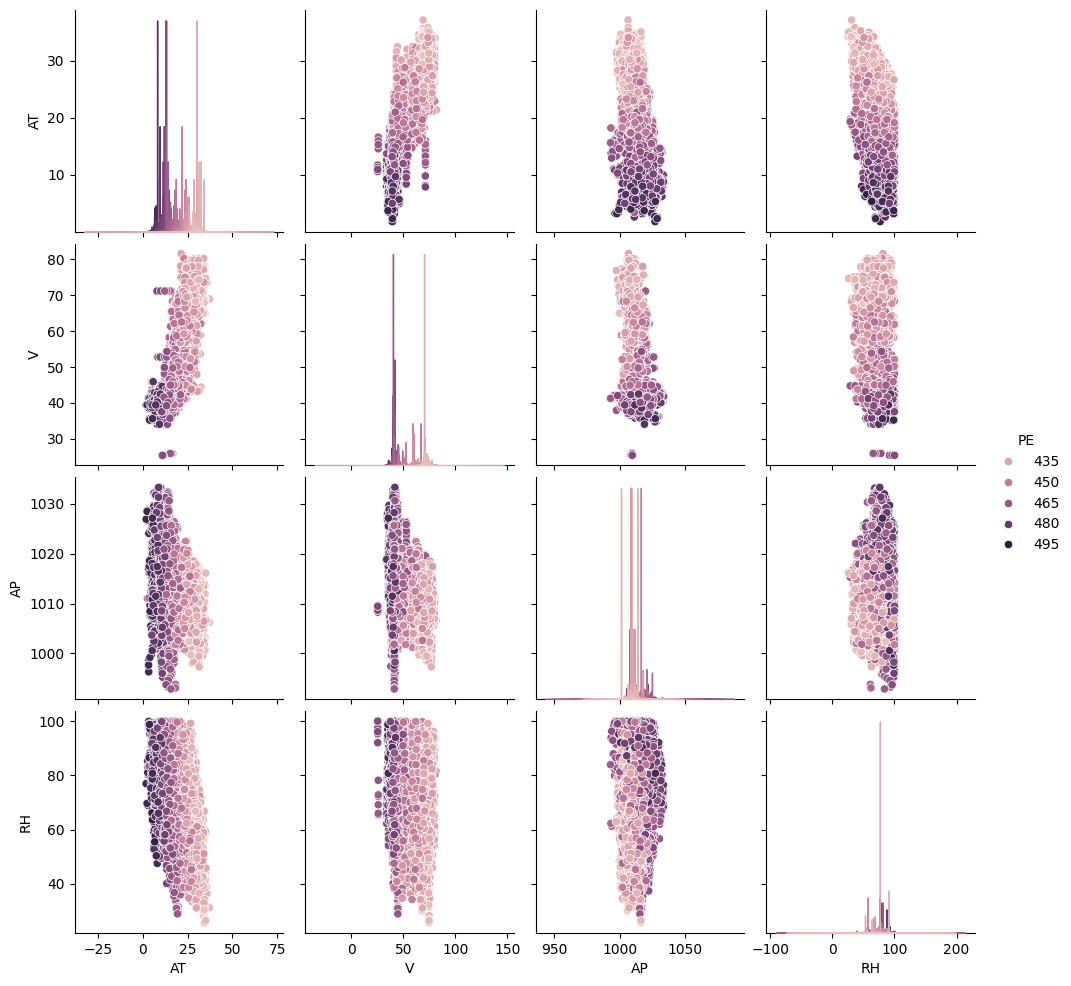

In [5]:
sns.pairplot(data=df,hue="PE")
# plt.show()

ii. Describe your findings: 
 - The distribution of V shows that the two classes are higher in number than the other classes
 - In AT vs AP, AT vs V and AT vs RH graph we can observe that the features are linearly separable
 - PE is inversely correlated to RH vs AT, AP vs AT

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:

# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
t = PrettyTable(['Column Name', 'Mean', 'Median', 'Range', 'First Quartile', 'Third Quartile', 'Inter-Quartile Range'])
for i in df.head():
    # print(i)
    temp_col = df[i]
    temp = [i, temp_col.mean(), temp_col.median(), str(temp_col.max())+ '-' +str(temp_col.min()), temp_col.quantile(0.25), temp_col.quantile(0.75), temp_col.quantile(0.75)-temp_col.quantile(0.25)]
    t.add_row(temp)
print(t)

+-------------+--------------------+--------------------+---------------+----------------+----------------+----------------------+
| Column Name |        Mean        |       Median       |     Range     | First Quartile | Third Quartile | Inter-Quartile Range |
+-------------+--------------------+--------------------+---------------+----------------+----------------+----------------------+
|      AT     | 19.65123118729097  |       20.345       |   37.11-1.81  |     13.51      |     25.72      |  12.209999999999999  |
|      V      | 54.30580372073579  |       52.08        |  81.56-25.36  |     41.74      |     66.54      |  24.800000000000004  |
|      AP     | 1013.2590781772575 |      1012.94       | 1033.3-992.89 |     1009.1     |    1017.26     |  8.159999999999968   |
|      RH     | 73.30897784280937  |       74.975       |  100.16-25.56 |    63.3275     |     84.83      |  21.502499999999998  |
|      PE     | 454.36500940635455 | 451.54999999999995 | 495.76-420.26 |     439.7

In [7]:
cols = []
for i in df.head():
    if(i!='PE'):
        cols.append(i)

### (c) Simple Linear Regression

In [8]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
# https://piazza.com/class/lll6cacyxjfg3/post/246
# https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
Y = df['PE']
t = PrettyTable(['Predictor', 'Coefficient', 'p-value', 'R_squared'])
models = []
for i in cols:
    X = df[i]
    model = sm.OLS(Y,sm.add_constant(X))
    model = model.fit()
    models.append(model)
    t.add_row([i, model.params[i], model.pvalues[i], model.rsquared])
print(t)

+-----------+---------------------+---------+---------------------+
| Predictor |     Coefficient     | p-value |      R_squared      |
+-----------+---------------------+---------+---------------------+
|     AT    |  -2.171319958517799 |   0.0   |  0.8989475964148236 |
|     V     | -1.1681351265557134 |   0.0   |  0.7565177870683979 |
|     AP    |  1.4898716733991115 |   0.0   | 0.26876865641106784 |
|     RH    | 0.45565010226298047 |   0.0   | 0.15193944023117445 |
+-----------+---------------------+---------+---------------------+


According to the above table, all the predictors are statistically significant. But if we take a look at the $R^{2}$ values, we can observe the relation between the predictor and the response.
 - Ambient Temperature explains 89.89% variability in the Energy Output
 - Exhaust Vacuum explains 75.65% variability in the Energy Output
 - Ambient Pressure explains 26.88% variability in the Energy Output
 - Relative Humidity explains 15.19% variability in the Energy Output

Thus, from above we can observe that Ambient Temperature and Exhaust Vacuum have the most association with the response.
  
We can also see from the below graphs the association between Ambient Temperature and Vacuum and the Energy Output

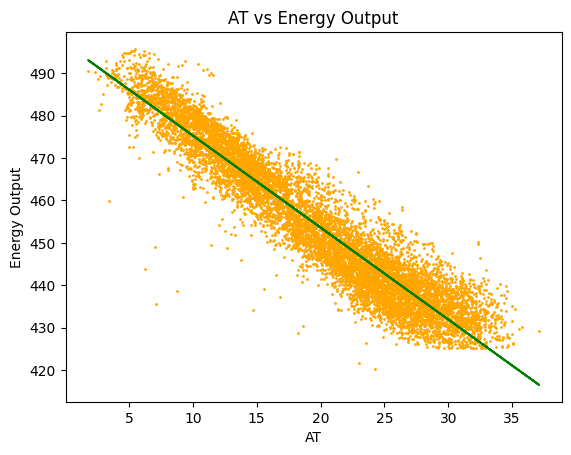

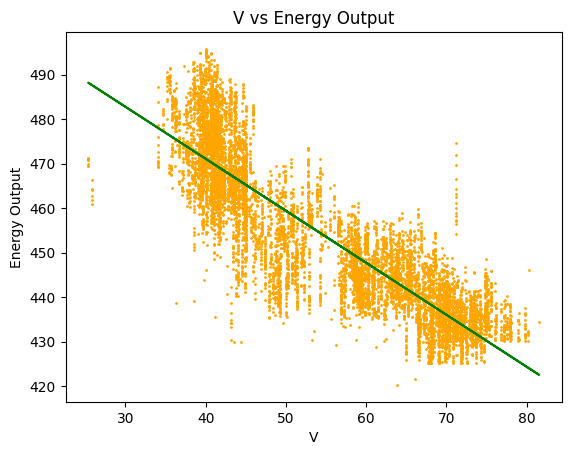

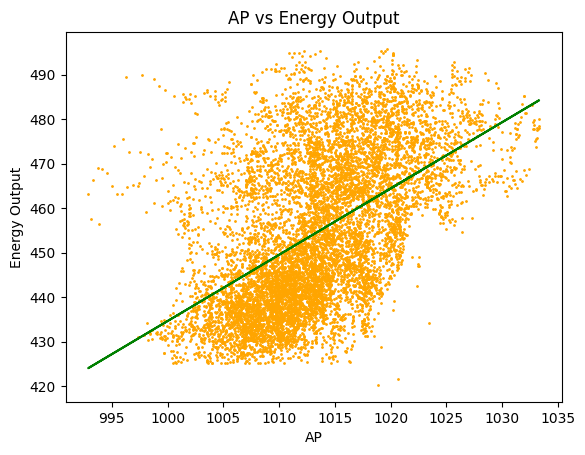

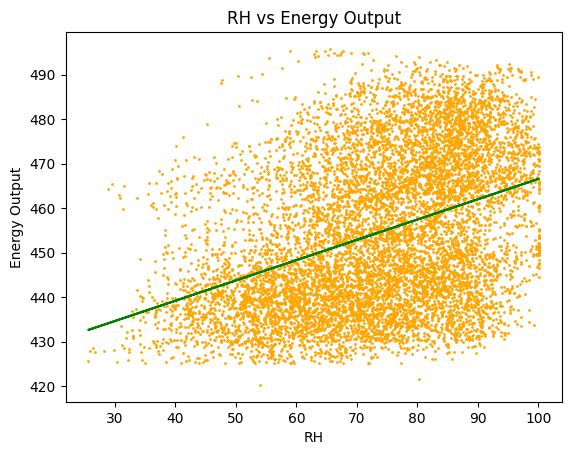

In [9]:
for count, i in enumerate(cols):
        plt.scatter(df[i],df['PE'], s = 1, c='orange')
        plt.xlabel(i)
        plt.ylabel('Energy Output')
        plt.plot(df[i], models[count].fittedvalues, c = 'green')
        plt.title(i+' vs Energy Output')
        plt.show()

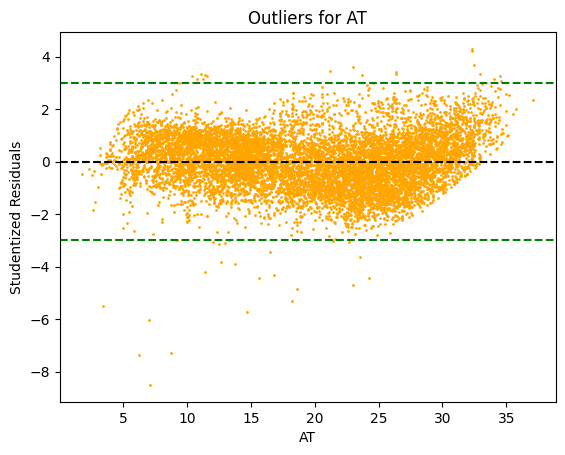

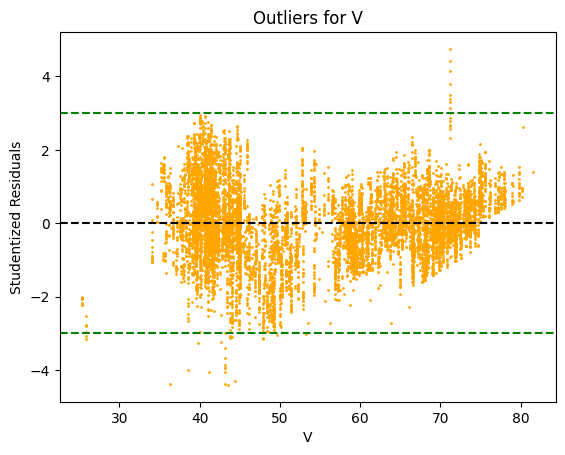

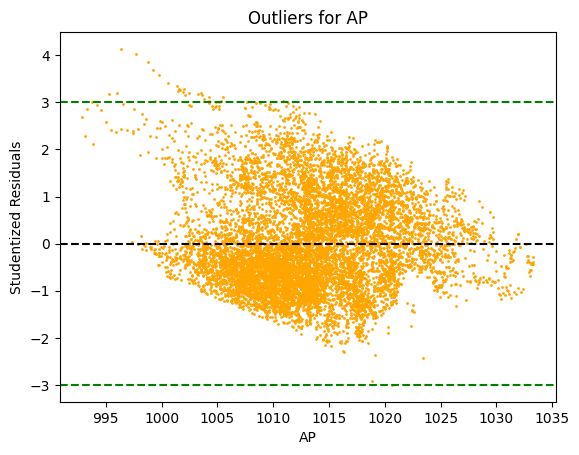

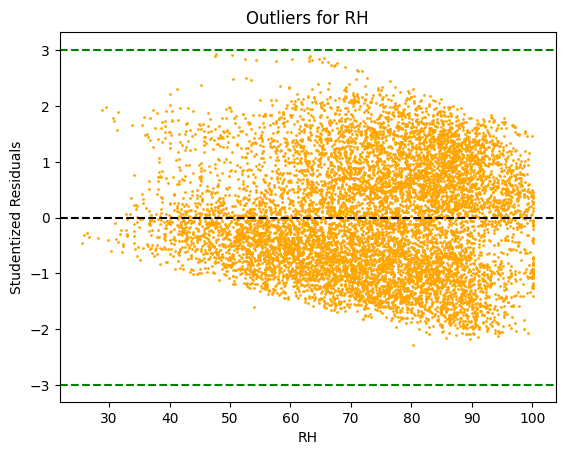

In [10]:
outlier_test_res = []
for count, i in enumerate(cols):
    # print(models[count])
    res = models[count].outlier_test()
    outlier_test_res.append(res)
    x = df[i]
    y = res['student_resid']
    # print(x.shape)
    # print(y)

    plt.scatter(x, y, s=1, c='orange')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axhline(y=3, color='green', linestyle='--')
    plt.axhline(y=-3, color='green', linestyle='--')
    plt.xlabel(i)
    plt.ylabel('Studentized Residuals')
    plt.title('Outliers for '+i)
    plt.show()

In [11]:
num_outliers = []
for count, i in enumerate(cols):
    y = outlier_test_res[count]['student_resid']
    out = 0
    for j in y:
        if(abs(j)>3):
            out+=1
    num_outliers.append(out)  
print(num_outliers)

[42, 33, 30, 2]


The above graphs show the outliers using the studentized residuals as stated in ISLR 3.3. Data points outside the green dashed lines are the outliers as any according to the studentized residuals any observations whose absolute value is greater than 3 are considered possible outliers.  
  
The results in the above cell indicate the number of outliers in each regression task. They are listed below :  
 - Ambient Temperature vs Energy Output : 42
 - Exhaust Vacuum vs Energy Output : 33
 - Ambient Pressue vs Energy Output : 30
 - Relative Humidity vs Energy Output : 2

### (d) Multiple Regression

In [12]:
Y = df['PE']
t = PrettyTable(['Predictor', 'Coefficient', 'p-value', 'R_squared'])
X = df[cols]
multi_reg_model = sm.OLS(Y,sm.add_constant(X))
multi_reg_model = multi_reg_model.fit()
t.add_row([cols, multi_reg_model.params, multi_reg_model.pvalues, multi_reg_model.rsquared])
print(t)

+-------------------------+---------------------+------------------------+--------------------+
|        Predictor        |     Coefficient     |        p-value         |     R_squared      |
+-------------------------+---------------------+------------------------+--------------------+
| ['AT', 'V', 'AP', 'RH'] | const    454.609274 | const     0.000000e+00 | 0.9286960898122536 |
|                         | AT        -1.977513 | AT        0.000000e+00 |                    |
|                         | V         -0.233916 | V        4.375305e-215 |                    |
|                         | AP         0.062083 | AP        5.507109e-11 |                    |
|                         | RH        -0.158054 | RH       3.104584e-293 |                    |
|                         |    dtype: float64   |     dtype: float64     |                    |
+-------------------------+---------------------+------------------------+--------------------+


### (e) 1c Compare to 1d

In [13]:
coeff_multi = []
coeff_linear = []
for count, i in enumerate(cols):
    # coeff_linear.append(models[count].params)
    coeff_multi.append(multi_reg_model.params.iloc[count+1])
    coeff_linear.append(models[count].params.iloc[1])
print(coeff_multi)
print(coeff_linear)

[-1.977513106635399, -0.23391642258249887, 0.062082943780857436, -0.1580541029164131]
[-2.171319958517799, -1.1681351265557134, 1.4898716733991115, 0.45565010226298047]


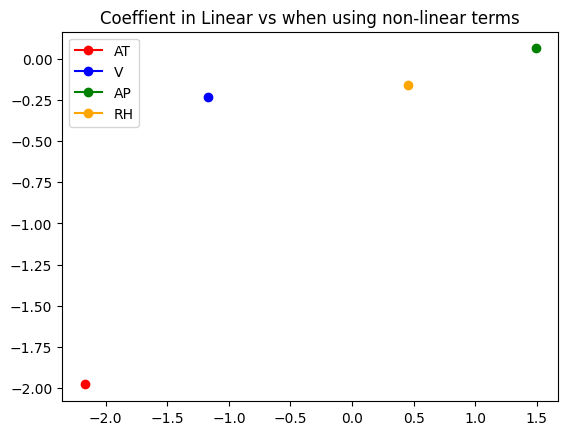

In [14]:
colors = ['red','blue', 'green', 'orange']
for i in range(0, len(cols)):
    plt.plot(coeff_linear[i], coeff_multi[i], color = colors[i], marker='o', label = cols[i])
plt.legend()
plt.title('Coeffient in Linear vs when using non-linear terms')
plt.show()

### (f) Nonlinear Association

In [15]:
poly_reg_models = {}
for i in cols:
    pf = PolynomialFeatures(degree=3)
    poly_features = pf.fit_transform(df[i].to_numpy().reshape(-1,1))
    y_poly = df['PE'].to_numpy()
    poly_reg_model = sm.OLS( y_poly, poly_features)
    poly_reg_model = poly_reg_model.fit()
    poly_reg_models[i] = poly_reg_model
    # print(poly_reg_model.summary())

In [16]:
for i in poly_reg_models:
    print('\nSummary for '+i)
    print(poly_reg_models[i].summary())


Summary for AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:27:53   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    

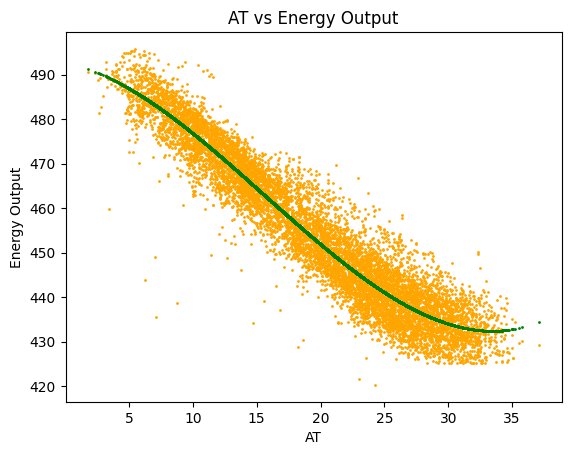

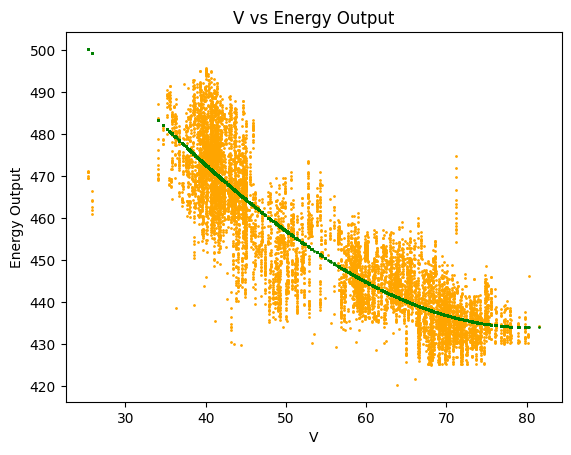

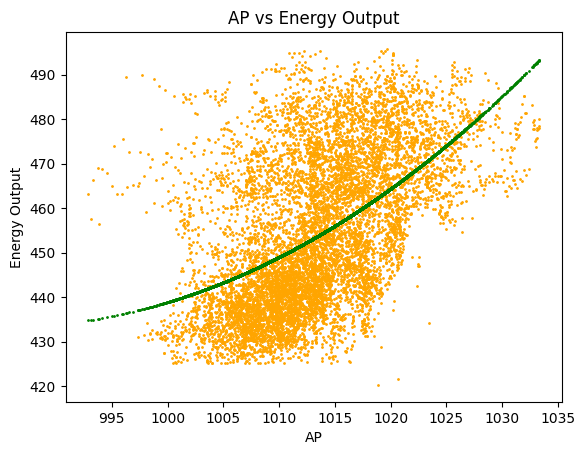

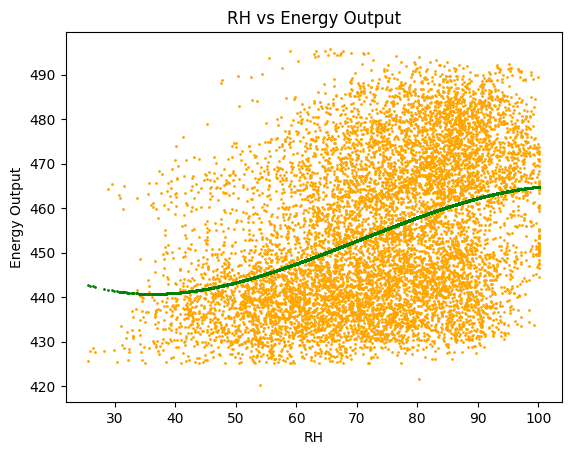

In [17]:
for i in cols:
    plt.scatter(df[i],df['PE'], s = 1, c='orange')
    plt.xlabel(i)
    plt.ylabel('Energy Output')
    plt.scatter(df[i], poly_reg_models[i].fittedvalues, s = 1 ,c = 'green')
    plt.title(i+' vs Energy Output')
    plt.show()

Observations:  
 - The p values for AP, RH and T are all statistically significant and as observed from the graph, we can say that there is a non-linear association between these predictors and the response.  
 - For V, the p value for $X^2$ is very high and it is statistically insignificant but as observed from the graph and the p values for $X^3$, there is still a non linear relationship between the predictor and the response

### (g) Interactions of Predictors

In [18]:
# https://www.statsmodels.org/dev/example_formulas.html
Y = df['PE']
t = PrettyTable([ 'Coefficient', 'p-value', 'R_squared'])
X = df[cols]
res_g = smf.ols(formula='PE ~ AP * RH + AP * AT + AP * V + RH * AT + RH * V + AT * V', data=df).fit()
# res_g = smf.ols(formula='PE ~ AP * RH + AP * V + RH * V', data=df).fit()
t.add_row([res_g.params, res_g.pvalues, res_g.rsquared])
print(t)
# print(res_g.summary())

+-------------------------+----------------------------+--------------------+
|       Coefficient       |          p-value           |     R_squared      |
+-------------------------+----------------------------+--------------------+
| Intercept    685.782468 | Intercept     3.231607e-18 | 0.9363057529178325 |
| AP            -0.152355 | AP            4.735732e-02 |                    |
| RH             1.570907 | RH            4.225213e-02 |                    |
| AP:RH         -0.001612 | AP:RH         3.360557e-02 |                    |
| AT            -4.347014 | AT            6.701873e-02 |                    |
| AP:AT          0.001759 | AP:AT         4.520509e-01 |                    |
| V             -7.674858 | V             1.371251e-08 |                    |
| AP:V           0.006812 | AP:V          2.877026e-07 |                    |
| RH:AT         -0.005230 | RH:AT         1.216944e-10 |                    |
| RH:V           0.000839 | RH:V          8.619366e-02 |        

It can be observed that although the p-values are very close to the threshold of 0.05, the interaction term $AP:AT$, and the term $RH:V$ are statistically insignificant. Even though the original terms such as $AT$ become statistically insignificant on addition of the interaction terms, we cannot get rid of it as the interactions are hard to predict without the main effects

### (h) Improvement

In [19]:
train, test = tts(df, test_size=0.3, random_state=42)
model_h_all = sm.OLS(train['PE'],sm.add_constant(train[cols])).fit()
pred_h_test_all = model_h_all.predict(sm.add_constant(test[cols]))
pred_h_train_all = model_h_all.predict(sm.add_constant(train[cols]))
# print(x_train)
print(eval_measures.mse(pred_h_test_all, test['PE']))
print(eval_measures.mse(pred_h_train_all, train['PE']))

21.239856938225273
20.580839725738702


In [20]:
res_h_complex = smf.ols(formula='PE ~ AP + AT + RH + V + AP * RH + AP * AT + AP * V + RH * AT + RH * V + AT * V + np.power(AP,2) + np.power(AT,2)+ np.power(RH,2)+ np.power(V,2)', data=train).fit()
# res_g = smf.ols(formula='PE ~ AP * RH + AP * V + RH * V', data=df).fit()
print(res_h_complex.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:27:54   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7664.9809   1429.568     

Here, if we set the standard value of p as 0.05, the p values of $V , AP:AT, AP:V, RH:V$ and $V^2$ is greater than the threshold, thus become statistically insignificant. But we cannot remove V, as stated earlier, but we can get rid of other terms and try to run the model again

In [21]:
res_h_complex = smf.ols(formula='PE ~ AP + AT + RH + V + AP * RH + RH * AT + AT * V + np.power(AP,2) + np.power(AT,2)+ np.power(RH,2)', data=train).fit()
# res_g = smf.ols(formula='PE ~ AP * RH + AP * V + RH * V', data=df).fit()
print(res_h_complex.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:27:54   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.046e+04   1091.512     

In [22]:
t = PrettyTable([ ' ', 'All Predictors', 'Complex Model'])

t.add_row(['Train Error', eval_measures.mse(model_h_all.predict(sm.add_constant(train[cols])), train['PE']), eval_measures.mse(res_h_complex.predict(sm.add_constant(train[cols])), train['PE'])])
t.add_row(['Test Error', eval_measures.mse(model_h_all.predict(sm.add_constant(test[cols])), test['PE']), eval_measures.mse(res_h_complex.predict(sm.add_constant(test[cols])), test['PE'])])
print(t)

+-------------+--------------------+--------------------+
|             |   All Predictors   |   Complex Model    |
+-------------+--------------------+--------------------+
| Train Error | 20.580839725738702 | 17.91781267118593  |
|  Test Error | 21.239856938225273 | 18.694346190992018 |
+-------------+--------------------+--------------------+


### (i) KNN

In [23]:
k_train_errors = []
k_test_errors = []
best_k_raw = 0
best_test_error_raw = 100000
for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(train[cols], train['PE'])
    y_pred_test = neigh.predict(test[cols])
    y_pred_train = neigh.predict(train[cols])
    k_train_errors.append(eval_measures.mse(train['PE'], y_pred_train))
    k_test_errors.append(eval_measures.mse(test['PE'], y_pred_test))

    if(eval_measures.mse(test['PE'], y_pred_test)<=best_test_error_raw):
        best_test_error_raw = eval_measures.mse(test['PE'], y_pred_test)
        best_k_raw = i
print(best_k_raw)
print(best_test_error_raw)

5
15.726819842563568


In [24]:
k_train_errors_normal = []
k_test_errors_normal = []
k_inverse = []

best_k_normal = 0
best_test_error_normal = 100000

scaler = MinMaxScaler()
train_normal = scaler.fit_transform(train[cols])
test_normal = scaler.transform(test[cols])
for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(train_normal, train['PE'])
    y_pred_test = neigh.predict(test_normal)
    y_pred_train = neigh.predict(train_normal)
    k_train_errors_normal.append(eval_measures.mse(train['PE'], y_pred_train))
    k_test_errors_normal.append(eval_measures.mse(test['PE'], y_pred_test))
    k_inverse.append(1/i)

    if(eval_measures.mse(test['PE'], y_pred_test)<=best_test_error_normal):
        best_test_error_normal = eval_measures.mse(test['PE'], y_pred_test)
        best_k_normal = i
print(best_k_normal)
print(best_test_error_normal)

4
14.291333431295715


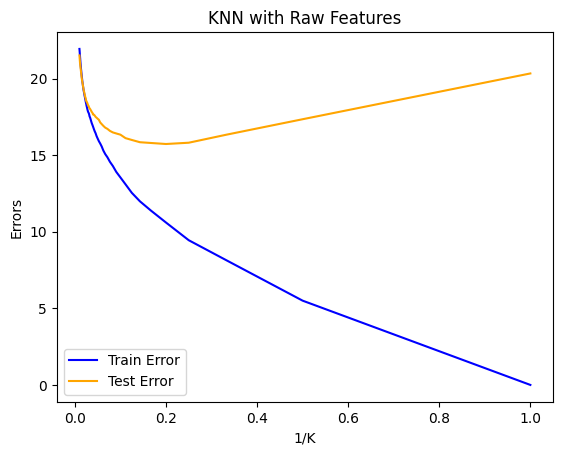

In [25]:
plt.plot(k_inverse, k_train_errors, color = 'blue', label='Train Error')
plt.plot(k_inverse, k_test_errors, color='orange', label='Test Error')
plt.xlabel('1/K')
plt.ylabel('Errors')
plt.legend()
plt.title('KNN with Raw Features')
plt.show()

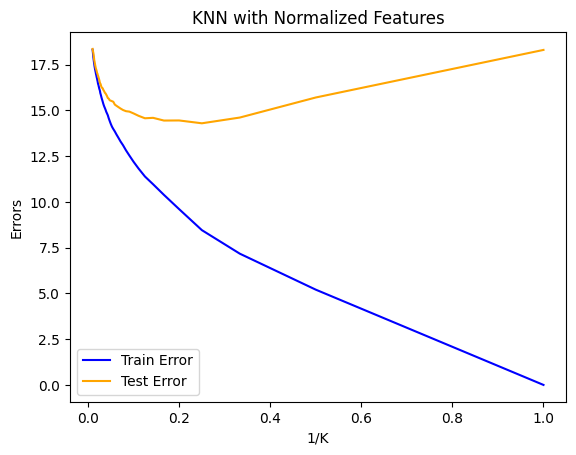

In [26]:
plt.plot(k_inverse, k_train_errors_normal, color = 'blue', label='Train Error')
plt.plot(k_inverse, k_test_errors_normal, color='orange', label='Test Error')
plt.xlabel('1/K')
plt.ylabel('Errors')
plt.legend()
plt.title('KNN with Normalized Features')
plt.show()

### (j ) Compare KNN and Linear

In [27]:
t = PrettyTable(['Linear Regression', 'KNN Regression'])
t.add_row([18.694346190992018,14.291333431295715])
print(t)

+--------------------+--------------------+
| Linear Regression  |   KNN Regression   |
+--------------------+--------------------+
| 18.694346190992018 | 14.291333431295715 |
+--------------------+--------------------+


KNN performs better here because of the non-linear nature of data

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

If the sample size is large, it means that we have enough training data and we can reduce the reducible error, and hence, the flexible model will be able to fit the data better and give reduced error 

### (b) The number of predictors p is extremely large, and the number of observations n is small.

If the number of predictors is large, and the sample size is small it means that our flexible model is likely to overfit. When a large sample size is available, we can ensure that there is a balance with variance and bias. Thus, the flexible model will work better than inflexible model

### (c) The relationship between the predictors and response is highly non-linear.

When the relationship between predictors and response is non-linear, flexible models work better because they can adjust to high variances of the non-linear model and hence, estimate better

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

If the Variance is high, it denotes that the model is noisy, which in turn means that a flexible model is more likely to overfit as it tires to accomodate the noise as data points. 

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [28]:
X = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
point = [0,0,0]
t = PrettyTable(['Obs', 'Point', 'Distance'])
for i in range(0,6):
    t.add_row([i+1, X[i], distance.euclidean(X[i], point)])

print(t)

+-----+------------+--------------------+
| Obs |   Point    |      Distance      |
+-----+------------+--------------------+
|  1  | [0, 3, 0]  |        3.0         |
|  2  | [2, 0, 0]  |        2.0         |
|  3  | [0, 1, 3]  | 3.1622776601683795 |
|  4  | [0, 1, 2]  |  2.23606797749979  |
|  5  | [-1, 0, 1] | 1.4142135623730951 |
|  6  | [1, 1, 1]  | 1.7320508075688772 |
+-----+------------+--------------------+


### (b) What is our prediction with K = 1? Why?

With K=1, our prediction is Obs 5, as it is closest to the [0,0,0] point and hence, our prediction is $Green$

### (c) What is our prediction with K = 3? Why?

With K=1, our prediction is Obs 2, Obs 5, and Obs 6 as they are the 3 closest to the [0,0,0] point and hence, our prediction is $Red$ as the observations are Red, Green and Red

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the decision boundary is highly non-linear, the best K would be small in order to accomodate the flexibility of the model. As K increases, the boundary becomes more linear, and thus, for a non-linear boundary, we need a smaller K.